In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import tqdm
from sklearn.preprocessing import MinMaxScaler

pd.options.display.float_format = '{:.5f}'.format

C:\Users\hmins\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('./datasets/PS_20174392719_1491204439457_log.csv')
data.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64000,C1231006815,170136.00000,160296.36000,M1979787155,0.00000,0.00000,0,0
1,1,PAYMENT,1864.28000,C1666544295,21249.00000,19384.72000,M2044282225,0.00000,0.00000,0,0
2,1,TRANSFER,181.00000,C1305486145,181.00000,0.00000,C553264065,0.00000,0.00000,1,0
3,1,CASH_OUT,181.00000,C840083671,181.00000,0.00000,C38997010,21182.00000,0.00000,1,0
4,1,PAYMENT,11668.14000,C2048537720,41554.00000,29885.86000,M1230701703,0.00000,0.00000,0,0
5,1,PAYMENT,7817.71000,C90045638,53860.00000,46042.29000,M573487274,0.00000,0.00000,0,0
6,1,PAYMENT,7107.77000,C154988899,183195.00000,176087.23000,M408069119,0.00000,0.00000,0,0
7,1,PAYMENT,7861.64000,C1912850431,176087.23000,168225.59000,M633326333,0.00000,0.00000,0,0
8,1,PAYMENT,4024.36000,C1265012928,2671.00000,0.00000,M1176932104,0.00000,0.00000,0,0
9,1,DEBIT,5337.77000,C712410124,41720.00000,36382.23000,C195600860,41898.00000,40348.79000,0,0


In [3]:
data.shape

(6362620, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## 칼럼 1 type
- CASH_OUT
- PAYMENT
- CASH_IN
- TRANSFER
- DEBIT

### Fraud는 CASH_OUT, TRANSFER 에서만 일어남.

In [5]:
data['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<Axes: xlabel='type', ylabel='count'>

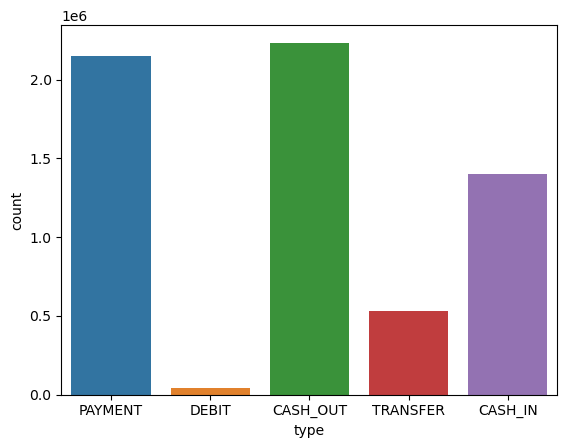

In [7]:
sns.countplot(x='type', data=data[data['isFraud'] == 0])

In [8]:
data[data['isFraud'] == 1]['type'].value_counts()

type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

## 칼럼 2 amount : 총 금액
- 로그 변환 해야할듯.

In [9]:
amount_max = data['amount'].max()
amount_min = data['amount'].min()
print('Amount 범위: ', amount_min, ' < amount < ', amount_max)

Amount 범위:  0.0  < amount <  92445516.64


In [10]:
data['amount'].describe()

count    6362620.00000
mean      179861.90355
std       603858.23146
min            0.00000
25%        13389.57000
50%        74871.94000
75%       208721.47750
max     92445516.64000
Name: amount, dtype: float64

In [11]:
fraud_amount_mean = data[data['isFraud'] == 1]['amount'].mean()
nonfraud_amount_mean = data[data['isFraud'] == 0]['amount'].mean()

print('Fraud amount 평균: ', fraud_amount_mean)
print('nonFraud amount 평균: ', nonfraud_amount_mean)

Fraud amount 평균:  1467967.299140387
nonFraud amount 평균:  178197.04172740763


C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


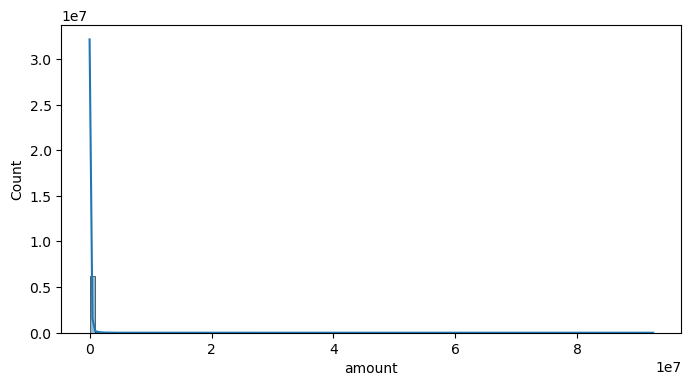

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(data['amount'], bins=100, kde=True)
plt.show()

In [13]:
amount_n = np.log1p(data['amount'])


C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


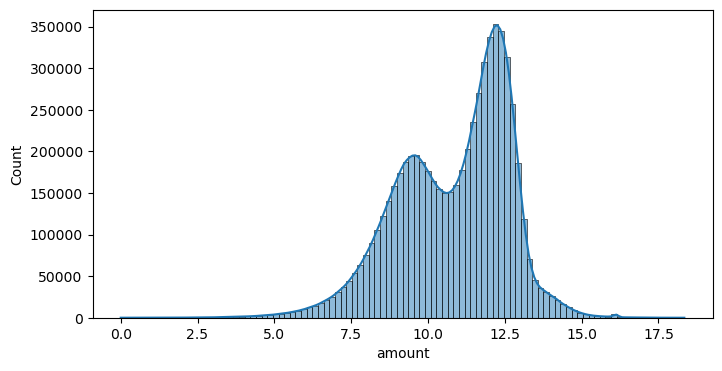

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(amount_n, bins=100, kde=True)
plt.show()

## 칼럼 3 nameOrig : 본인 계좌
- 제거 칼럼

In [15]:
data = data.drop(labels='nameOrig', axis=1)
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64000,170136.00000,160296.36000,M1979787155,0.00000,0.00000,0,0
1,1,PAYMENT,1864.28000,21249.00000,19384.72000,M2044282225,0.00000,0.00000,0,0
2,1,TRANSFER,181.00000,181.00000,0.00000,C553264065,0.00000,0.00000,1,0
3,1,CASH_OUT,181.00000,181.00000,0.00000,C38997010,21182.00000,0.00000,1,0
4,1,PAYMENT,11668.14000,41554.00000,29885.86000,M1230701703,0.00000,0.00000,0,0


## 칼럼 4 oldbalanceOrig : 거래 전 계좌잔고
## 칼럼 5 newbalanceOrig : 거래 후 계좌잔고
- oldbalanceOrig +- amount = newbalanceOrig

## 칼럼 6 nameDest : 상대 계좌번호
- M, C 두 가지 확인
- C 에서만 사기 거래 확인

In [16]:
data['infoDest'] = data['nameDest'].apply(lambda x: x[0])
data['infoDest'].head()

0    M
1    M
2    C
3    C
4    M
Name: infoDest, dtype: object

<Axes: xlabel='infoDest', ylabel='count'>

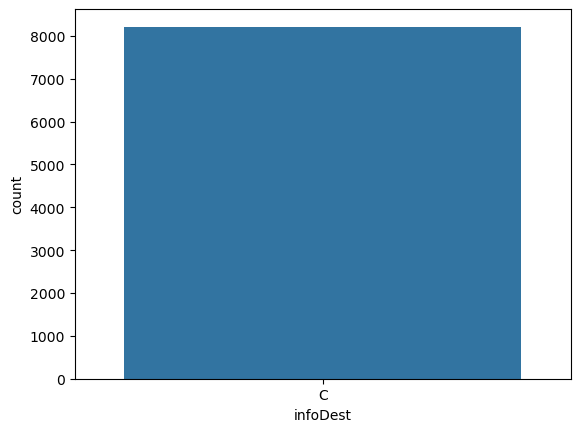

In [17]:
sns.countplot(x = 'infoDest', data = data[data['isFraud'] == 1])

## 클래스

- pos : fraud
- neg : nonfraud 를 fraud 개수 만큼 랜덤으로 추출

In [18]:
class Encoder(torch.utils.data.Dataset):
    def __init__(self, dataframe, seed=1):

        pos = dataframe[dataframe['isFraud']==1]
        neg = dataframe[dataframe['isFraud']==0].sample(
            len(pos), random_state=seed)
        df = pd.concat([pos, neg])

        catCols = ['type', 'infoDest']
        catVecs = pd.get_dummies(df[catCols]).values
        
        contCols = ['amount']
    
        scaler = MinMaxScaler()
        contVecs = scaler.fit_transform(df[contCols])
        
        self.targets = np.hstack([catVecs, contVecs])
        self.labels = df['isFraud'].values
        
    def __getitem__(self, i):
        return self.targets[i, :], self.labels[i]
        
    def __len__(self):
        return len(self.targets)
         

In [19]:
dataset = Encoder(data)
dataset

In [20]:
train_size = int(0.65 * len(dataset))
validation_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - validation_size
train_set, validation_set, test_set = torch.utils.data.random_split(
    dataset, [train_size, validation_size, test_size])

In [21]:
np.random.seed(1)
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=821, shuffle=True)
validation_loader = torch.utils.data.DataLoader(
    validation_set, batch_size=821, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    test_set, batch_size=821, shuffle=True)
data_loaders = {"train": train_loader, "validation": validation_loader}

In [22]:
class SingleNeuralNetClassifier(nn.Module):
    def __init__(self, vec_size):
        super(SingleNeuralNetClassifier, self).__init__()
        self.fc = nn.Linear(vec_size, 1)
    
    def forward(self, inputs):
        return self.fc(inputs.squeeze(1).float())

In [23]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [24]:
def train_model(model, data_loaders, n_epochs=100):
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam([p for p in model.parameters() if p.requires_grad],
                        lr=0.001)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min')
    all_losses = {'train': [], 'validation': []}
    for epoch in range(n_epochs):
        losses = {'train': [], 'validation': []}
        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train(True)
            else:
                model.train(False)
            
            progress_bar = tqdm.notebook.tqdm(data_loaders[phase], leave=False)
            total = 0
            for inputs, target in progress_bar:
                model.zero_grad()

                output = model(inputs)
                loss = criterion(output.squeeze(), target.float())
                    
                nn.utils.clip_grad_norm_(model.parameters(), 3)

                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()
                
                progress_bar.set_description(f'Loss: {loss.item():.3f}')
                
                losses[phase].append(loss.item())
                total += 1
        
            epoch_loss = sum(losses[phase]) / total
            all_losses[phase].append(epoch_loss)
        scheduler.step(all_losses['validation'][-1])
                    
        mess = ("Epoch #{0}\tTrain Loss: {1:.3f}\t"
                "Validation Loss: {2:.3f}").format(
                    epoch + 1, all_losses['train'][-1],
                    all_losses['validation'][-1])
        tqdm.tqdm.write(mess)

In [25]:
snnc_model = SingleNeuralNetClassifier(8)
train_model(snnc_model, data_loaders, n_epochs=500)

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #1	Train Loss: 0.732	Validation Loss: 0.724


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #2	Train Loss: 0.722	Validation Loss: 0.718


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #3	Train Loss: 0.721	Validation Loss: 0.712


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #4	Train Loss: 0.706	Validation Loss: 0.706


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #5	Train Loss: 0.698	Validation Loss: 0.700


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #6	Train Loss: 0.694	Validation Loss: 0.695


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #7	Train Loss: 0.693	Validation Loss: 0.689


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #8	Train Loss: 0.689	Validation Loss: 0.684


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #9	Train Loss: 0.677	Validation Loss: 0.678


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #10	Train Loss: 0.676	Validation Loss: 0.673


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #11	Train Loss: 0.666	Validation Loss: 0.668


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #12	Train Loss: 0.665	Validation Loss: 0.664


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #13	Train Loss: 0.659	Validation Loss: 0.659


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #14	Train Loss: 0.653	Validation Loss: 0.655


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #15	Train Loss: 0.652	Validation Loss: 0.651


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #16	Train Loss: 0.638	Validation Loss: 0.646


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #17	Train Loss: 0.637	Validation Loss: 0.641


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #18	Train Loss: 0.638	Validation Loss: 0.637


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #19	Train Loss: 0.630	Validation Loss: 0.633


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #20	Train Loss: 0.622	Validation Loss: 0.629


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #21	Train Loss: 0.619	Validation Loss: 0.625


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #22	Train Loss: 0.628	Validation Loss: 0.621


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #23	Train Loss: 0.613	Validation Loss: 0.617


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #24	Train Loss: 0.613	Validation Loss: 0.614


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #25	Train Loss: 0.609	Validation Loss: 0.610


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #26	Train Loss: 0.602	Validation Loss: 0.606


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #27	Train Loss: 0.612	Validation Loss: 0.603


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #28	Train Loss: 0.592	Validation Loss: 0.599


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #29	Train Loss: 0.589	Validation Loss: 0.596


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #30	Train Loss: 0.594	Validation Loss: 0.593


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #31	Train Loss: 0.582	Validation Loss: 0.590


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #32	Train Loss: 0.583	Validation Loss: 0.587


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #33	Train Loss: 0.592	Validation Loss: 0.584


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #34	Train Loss: 0.567	Validation Loss: 0.582


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #35	Train Loss: 0.564	Validation Loss: 0.579


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #36	Train Loss: 0.561	Validation Loss: 0.576


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #37	Train Loss: 0.568	Validation Loss: 0.573


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #38	Train Loss: 0.569	Validation Loss: 0.570


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #39	Train Loss: 0.571	Validation Loss: 0.568


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #40	Train Loss: 0.554	Validation Loss: 0.565


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #41	Train Loss: 0.556	Validation Loss: 0.562


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #42	Train Loss: 0.554	Validation Loss: 0.560


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #43	Train Loss: 0.551	Validation Loss: 0.557


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #44	Train Loss: 0.549	Validation Loss: 0.555


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #45	Train Loss: 0.546	Validation Loss: 0.553


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #46	Train Loss: 0.539	Validation Loss: 0.551


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #47	Train Loss: 0.551	Validation Loss: 0.548


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #48	Train Loss: 0.540	Validation Loss: 0.546


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #49	Train Loss: 0.537	Validation Loss: 0.544


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #50	Train Loss: 0.555	Validation Loss: 0.542


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #51	Train Loss: 0.522	Validation Loss: 0.540


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #52	Train Loss: 0.543	Validation Loss: 0.538


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #53	Train Loss: 0.530	Validation Loss: 0.536


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #54	Train Loss: 0.526	Validation Loss: 0.534


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #55	Train Loss: 0.517	Validation Loss: 0.532


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #56	Train Loss: 0.540	Validation Loss: 0.530


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #57	Train Loss: 0.523	Validation Loss: 0.529


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #58	Train Loss: 0.538	Validation Loss: 0.527


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #59	Train Loss: 0.530	Validation Loss: 0.525


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #60	Train Loss: 0.528	Validation Loss: 0.524


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #61	Train Loss: 0.520	Validation Loss: 0.522


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #62	Train Loss: 0.533	Validation Loss: 0.520


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #63	Train Loss: 0.513	Validation Loss: 0.518


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #64	Train Loss: 0.512	Validation Loss: 0.517


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #65	Train Loss: 0.499	Validation Loss: 0.515


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #66	Train Loss: 0.500	Validation Loss: 0.514


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #67	Train Loss: 0.524	Validation Loss: 0.512


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #68	Train Loss: 0.506	Validation Loss: 0.511


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #69	Train Loss: 0.507	Validation Loss: 0.509


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #70	Train Loss: 0.498	Validation Loss: 0.508


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #71	Train Loss: 0.498	Validation Loss: 0.506


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #72	Train Loss: 0.501	Validation Loss: 0.505


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #73	Train Loss: 0.492	Validation Loss: 0.503


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #74	Train Loss: 0.491	Validation Loss: 0.502


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #75	Train Loss: 0.504	Validation Loss: 0.501


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #76	Train Loss: 0.485	Validation Loss: 0.499


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #77	Train Loss: 0.481	Validation Loss: 0.498


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #78	Train Loss: 0.510	Validation Loss: 0.497


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #79	Train Loss: 0.482	Validation Loss: 0.496


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #80	Train Loss: 0.495	Validation Loss: 0.494


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #81	Train Loss: 0.497	Validation Loss: 0.493


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #82	Train Loss: 0.498	Validation Loss: 0.492


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #83	Train Loss: 0.491	Validation Loss: 0.490


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #84	Train Loss: 0.497	Validation Loss: 0.489


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #85	Train Loss: 0.483	Validation Loss: 0.488


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #86	Train Loss: 0.497	Validation Loss: 0.487


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #87	Train Loss: 0.481	Validation Loss: 0.486


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #88	Train Loss: 0.488	Validation Loss: 0.485


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #89	Train Loss: 0.471	Validation Loss: 0.484


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #90	Train Loss: 0.472	Validation Loss: 0.484


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #91	Train Loss: 0.490	Validation Loss: 0.483


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #92	Train Loss: 0.481	Validation Loss: 0.482


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #93	Train Loss: 0.467	Validation Loss: 0.481


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #94	Train Loss: 0.462	Validation Loss: 0.480


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #95	Train Loss: 0.477	Validation Loss: 0.479


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #96	Train Loss: 0.461	Validation Loss: 0.478


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #97	Train Loss: 0.468	Validation Loss: 0.477


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #98	Train Loss: 0.498	Validation Loss: 0.476


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #99	Train Loss: 0.469	Validation Loss: 0.475


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #100	Train Loss: 0.488	Validation Loss: 0.474


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #101	Train Loss: 0.446	Validation Loss: 0.473


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #102	Train Loss: 0.453	Validation Loss: 0.472


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #103	Train Loss: 0.459	Validation Loss: 0.471


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #104	Train Loss: 0.459	Validation Loss: 0.471


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #105	Train Loss: 0.444	Validation Loss: 0.470


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #106	Train Loss: 0.470	Validation Loss: 0.469


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #107	Train Loss: 0.452	Validation Loss: 0.468


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #108	Train Loss: 0.445	Validation Loss: 0.467


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #109	Train Loss: 0.449	Validation Loss: 0.466


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #110	Train Loss: 0.490	Validation Loss: 0.466


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #111	Train Loss: 0.488	Validation Loss: 0.465


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #112	Train Loss: 0.472	Validation Loss: 0.464


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #113	Train Loss: 0.481	Validation Loss: 0.463


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #114	Train Loss: 0.452	Validation Loss: 0.462


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #115	Train Loss: 0.454	Validation Loss: 0.462


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #116	Train Loss: 0.464	Validation Loss: 0.461


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #117	Train Loss: 0.470	Validation Loss: 0.460


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #118	Train Loss: 0.477	Validation Loss: 0.460


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #119	Train Loss: 0.451	Validation Loss: 0.459


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #120	Train Loss: 0.452	Validation Loss: 0.458


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #121	Train Loss: 0.446	Validation Loss: 0.458


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #122	Train Loss: 0.444	Validation Loss: 0.457


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #123	Train Loss: 0.434	Validation Loss: 0.457


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #124	Train Loss: 0.458	Validation Loss: 0.456


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #125	Train Loss: 0.438	Validation Loss: 0.455


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #126	Train Loss: 0.453	Validation Loss: 0.455


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #127	Train Loss: 0.449	Validation Loss: 0.454


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #128	Train Loss: 0.461	Validation Loss: 0.453


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #129	Train Loss: 0.447	Validation Loss: 0.453


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #130	Train Loss: 0.473	Validation Loss: 0.452


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #131	Train Loss: 0.467	Validation Loss: 0.452


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #132	Train Loss: 0.432	Validation Loss: 0.451


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #133	Train Loss: 0.449	Validation Loss: 0.450


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #134	Train Loss: 0.427	Validation Loss: 0.450


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #135	Train Loss: 0.440	Validation Loss: 0.449


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #136	Train Loss: 0.433	Validation Loss: 0.449


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #137	Train Loss: 0.451	Validation Loss: 0.448


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #138	Train Loss: 0.432	Validation Loss: 0.448


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #139	Train Loss: 0.416	Validation Loss: 0.447


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #140	Train Loss: 0.438	Validation Loss: 0.447


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #141	Train Loss: 0.430	Validation Loss: 0.446


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #142	Train Loss: 0.454	Validation Loss: 0.445


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #143	Train Loss: 0.425	Validation Loss: 0.445


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #144	Train Loss: 0.435	Validation Loss: 0.444


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #145	Train Loss: 0.437	Validation Loss: 0.444


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #146	Train Loss: 0.423	Validation Loss: 0.443


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #147	Train Loss: 0.427	Validation Loss: 0.443


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #148	Train Loss: 0.425	Validation Loss: 0.442


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #149	Train Loss: 0.464	Validation Loss: 0.442


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #150	Train Loss: 0.432	Validation Loss: 0.442


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #151	Train Loss: 0.425	Validation Loss: 0.441


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #152	Train Loss: 0.419	Validation Loss: 0.441


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #153	Train Loss: 0.427	Validation Loss: 0.440


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #154	Train Loss: 0.424	Validation Loss: 0.440


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #155	Train Loss: 0.448	Validation Loss: 0.439


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #156	Train Loss: 0.411	Validation Loss: 0.438


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #157	Train Loss: 0.461	Validation Loss: 0.438


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #158	Train Loss: 0.425	Validation Loss: 0.438


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #159	Train Loss: 0.430	Validation Loss: 0.437


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #160	Train Loss: 0.429	Validation Loss: 0.437


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #161	Train Loss: 0.429	Validation Loss: 0.437


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #162	Train Loss: 0.427	Validation Loss: 0.436


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #163	Train Loss: 0.426	Validation Loss: 0.436


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #164	Train Loss: 0.413	Validation Loss: 0.435


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #165	Train Loss: 0.429	Validation Loss: 0.435


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #166	Train Loss: 0.434	Validation Loss: 0.434


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #167	Train Loss: 0.423	Validation Loss: 0.434


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #168	Train Loss: 0.442	Validation Loss: 0.434


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #169	Train Loss: 0.426	Validation Loss: 0.433


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #170	Train Loss: 0.407	Validation Loss: 0.433


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #171	Train Loss: 0.420	Validation Loss: 0.432


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #172	Train Loss: 0.406	Validation Loss: 0.432


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #173	Train Loss: 0.431	Validation Loss: 0.432


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #174	Train Loss: 0.419	Validation Loss: 0.431


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #175	Train Loss: 0.443	Validation Loss: 0.431


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #176	Train Loss: 0.418	Validation Loss: 0.431


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #177	Train Loss: 0.408	Validation Loss: 0.431


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #178	Train Loss: 0.441	Validation Loss: 0.430


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #179	Train Loss: 0.424	Validation Loss: 0.430


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #180	Train Loss: 0.433	Validation Loss: 0.430


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #181	Train Loss: 0.468	Validation Loss: 0.429


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #182	Train Loss: 0.420	Validation Loss: 0.429


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #183	Train Loss: 0.416	Validation Loss: 0.428


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #184	Train Loss: 0.427	Validation Loss: 0.428


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #185	Train Loss: 0.411	Validation Loss: 0.428


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #186	Train Loss: 0.427	Validation Loss: 0.427


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #187	Train Loss: 0.416	Validation Loss: 0.427


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #188	Train Loss: 0.418	Validation Loss: 0.427


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #189	Train Loss: 0.403	Validation Loss: 0.427


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #190	Train Loss: 0.419	Validation Loss: 0.426


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #191	Train Loss: 0.427	Validation Loss: 0.426


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #192	Train Loss: 0.400	Validation Loss: 0.426


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #193	Train Loss: 0.402	Validation Loss: 0.425


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #194	Train Loss: 0.409	Validation Loss: 0.425


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #195	Train Loss: 0.425	Validation Loss: 0.425


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #196	Train Loss: 0.399	Validation Loss: 0.425


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #197	Train Loss: 0.406	Validation Loss: 0.424


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #198	Train Loss: 0.431	Validation Loss: 0.424


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #199	Train Loss: 0.447	Validation Loss: 0.424


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #200	Train Loss: 0.407	Validation Loss: 0.424


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #201	Train Loss: 0.404	Validation Loss: 0.424


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #202	Train Loss: 0.411	Validation Loss: 0.423


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #203	Train Loss: 0.425	Validation Loss: 0.423


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #204	Train Loss: 0.421	Validation Loss: 0.423


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #205	Train Loss: 0.403	Validation Loss: 0.422


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #206	Train Loss: 0.414	Validation Loss: 0.422


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #207	Train Loss: 0.425	Validation Loss: 0.422


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #208	Train Loss: 0.405	Validation Loss: 0.421


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #209	Train Loss: 0.414	Validation Loss: 0.421


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #210	Train Loss: 0.420	Validation Loss: 0.421


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #211	Train Loss: 0.431	Validation Loss: 0.421


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #212	Train Loss: 0.418	Validation Loss: 0.420


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #213	Train Loss: 0.418	Validation Loss: 0.420


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #214	Train Loss: 0.472	Validation Loss: 0.420


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #215	Train Loss: 0.407	Validation Loss: 0.420


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #216	Train Loss: 0.419	Validation Loss: 0.419


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #217	Train Loss: 0.403	Validation Loss: 0.419


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #218	Train Loss: 0.423	Validation Loss: 0.419


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #219	Train Loss: 0.402	Validation Loss: 0.419


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #220	Train Loss: 0.404	Validation Loss: 0.419


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #221	Train Loss: 0.412	Validation Loss: 0.419


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #222	Train Loss: 0.431	Validation Loss: 0.419


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #223	Train Loss: 0.392	Validation Loss: 0.418


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #224	Train Loss: 0.435	Validation Loss: 0.418


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #225	Train Loss: 0.409	Validation Loss: 0.418


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #226	Train Loss: 0.396	Validation Loss: 0.417


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #227	Train Loss: 0.417	Validation Loss: 0.417


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #228	Train Loss: 0.418	Validation Loss: 0.417


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #229	Train Loss: 0.392	Validation Loss: 0.417


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #230	Train Loss: 0.396	Validation Loss: 0.417


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #231	Train Loss: 0.417	Validation Loss: 0.417


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #232	Train Loss: 0.406	Validation Loss: 0.416


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #233	Train Loss: 0.418	Validation Loss: 0.416


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #234	Train Loss: 0.402	Validation Loss: 0.416


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #235	Train Loss: 0.399	Validation Loss: 0.416


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #236	Train Loss: 0.407	Validation Loss: 0.416


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #237	Train Loss: 0.417	Validation Loss: 0.415


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #238	Train Loss: 0.390	Validation Loss: 0.415


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #239	Train Loss: 0.421	Validation Loss: 0.415


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #240	Train Loss: 0.407	Validation Loss: 0.415


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #241	Train Loss: 0.393	Validation Loss: 0.414


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #242	Train Loss: 0.390	Validation Loss: 0.414


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #243	Train Loss: 0.416	Validation Loss: 0.414


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #244	Train Loss: 0.387	Validation Loss: 0.414


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #245	Train Loss: 0.406	Validation Loss: 0.414


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #246	Train Loss: 0.384	Validation Loss: 0.414


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #247	Train Loss: 0.408	Validation Loss: 0.413


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #248	Train Loss: 0.404	Validation Loss: 0.413


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #249	Train Loss: 0.404	Validation Loss: 0.413


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #250	Train Loss: 0.405	Validation Loss: 0.413


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #251	Train Loss: 0.431	Validation Loss: 0.412


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #252	Train Loss: 0.413	Validation Loss: 0.412


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #253	Train Loss: 0.397	Validation Loss: 0.412


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #254	Train Loss: 0.423	Validation Loss: 0.412


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #255	Train Loss: 0.413	Validation Loss: 0.412


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #256	Train Loss: 0.399	Validation Loss: 0.412


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #257	Train Loss: 0.449	Validation Loss: 0.412


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #258	Train Loss: 0.410	Validation Loss: 0.412


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #259	Train Loss: 0.385	Validation Loss: 0.412


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #260	Train Loss: 0.387	Validation Loss: 0.412


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #261	Train Loss: 0.387	Validation Loss: 0.411


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #262	Train Loss: 0.394	Validation Loss: 0.411


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #263	Train Loss: 0.394	Validation Loss: 0.411


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #264	Train Loss: 0.414	Validation Loss: 0.411


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #265	Train Loss: 0.439	Validation Loss: 0.411


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #266	Train Loss: 0.412	Validation Loss: 0.411


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #267	Train Loss: 0.409	Validation Loss: 0.411


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #268	Train Loss: 0.417	Validation Loss: 0.410


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #269	Train Loss: 0.416	Validation Loss: 0.410


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #270	Train Loss: 0.383	Validation Loss: 0.410


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #271	Train Loss: 0.401	Validation Loss: 0.410


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #272	Train Loss: 0.447	Validation Loss: 0.409


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #273	Train Loss: 0.398	Validation Loss: 0.409


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #274	Train Loss: 0.396	Validation Loss: 0.409


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #275	Train Loss: 0.417	Validation Loss: 0.409


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #276	Train Loss: 0.392	Validation Loss: 0.409


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #277	Train Loss: 0.398	Validation Loss: 0.409


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #278	Train Loss: 0.395	Validation Loss: 0.408


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #279	Train Loss: 0.397	Validation Loss: 0.408


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #280	Train Loss: 0.413	Validation Loss: 0.408


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #281	Train Loss: 0.404	Validation Loss: 0.408


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #282	Train Loss: 0.404	Validation Loss: 0.408


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #283	Train Loss: 0.416	Validation Loss: 0.408


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #284	Train Loss: 0.419	Validation Loss: 0.408


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #285	Train Loss: 0.405	Validation Loss: 0.408


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #286	Train Loss: 0.381	Validation Loss: 0.407


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #287	Train Loss: 0.427	Validation Loss: 0.407


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #288	Train Loss: 0.437	Validation Loss: 0.407


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #289	Train Loss: 0.403	Validation Loss: 0.407


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #290	Train Loss: 0.440	Validation Loss: 0.407


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #291	Train Loss: 0.397	Validation Loss: 0.407


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #292	Train Loss: 0.432	Validation Loss: 0.407


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #293	Train Loss: 0.413	Validation Loss: 0.406


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #294	Train Loss: 0.417	Validation Loss: 0.406


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #295	Train Loss: 0.393	Validation Loss: 0.406


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #296	Train Loss: 0.396	Validation Loss: 0.406


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #297	Train Loss: 0.413	Validation Loss: 0.406


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #298	Train Loss: 0.392	Validation Loss: 0.406


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #299	Train Loss: 0.392	Validation Loss: 0.406


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #300	Train Loss: 0.392	Validation Loss: 0.406


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #301	Train Loss: 0.411	Validation Loss: 0.406


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #302	Train Loss: 0.389	Validation Loss: 0.405


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #303	Train Loss: 0.377	Validation Loss: 0.405


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #304	Train Loss: 0.389	Validation Loss: 0.405


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #305	Train Loss: 0.449	Validation Loss: 0.405


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #306	Train Loss: 0.400	Validation Loss: 0.405


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #307	Train Loss: 0.397	Validation Loss: 0.405


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #308	Train Loss: 0.408	Validation Loss: 0.405


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #309	Train Loss: 0.389	Validation Loss: 0.405


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #310	Train Loss: 0.403	Validation Loss: 0.405


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #311	Train Loss: 0.400	Validation Loss: 0.405


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #312	Train Loss: 0.417	Validation Loss: 0.405


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #313	Train Loss: 0.391	Validation Loss: 0.405


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #314	Train Loss: 0.395	Validation Loss: 0.405


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #315	Train Loss: 0.396	Validation Loss: 0.404


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #316	Train Loss: 0.429	Validation Loss: 0.404


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #317	Train Loss: 0.406	Validation Loss: 0.404


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #318	Train Loss: 0.390	Validation Loss: 0.404


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #319	Train Loss: 0.408	Validation Loss: 0.404


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #320	Train Loss: 0.397	Validation Loss: 0.404


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #321	Train Loss: 0.414	Validation Loss: 0.403


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #322	Train Loss: 0.406	Validation Loss: 0.403


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #323	Train Loss: 0.400	Validation Loss: 0.403


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #324	Train Loss: 0.392	Validation Loss: 0.403


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #325	Train Loss: 0.404	Validation Loss: 0.403


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #326	Train Loss: 0.408	Validation Loss: 0.403


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #327	Train Loss: 0.392	Validation Loss: 0.403


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #328	Train Loss: 0.376	Validation Loss: 0.403


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #329	Train Loss: 0.398	Validation Loss: 0.403


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #330	Train Loss: 0.394	Validation Loss: 0.402


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #331	Train Loss: 0.402	Validation Loss: 0.402


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #332	Train Loss: 0.404	Validation Loss: 0.402


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #333	Train Loss: 0.398	Validation Loss: 0.402


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #334	Train Loss: 0.388	Validation Loss: 0.402


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #335	Train Loss: 0.411	Validation Loss: 0.402


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #336	Train Loss: 0.396	Validation Loss: 0.402


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #337	Train Loss: 0.378	Validation Loss: 0.402


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #338	Train Loss: 0.446	Validation Loss: 0.402


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #339	Train Loss: 0.389	Validation Loss: 0.402


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #340	Train Loss: 0.445	Validation Loss: 0.402


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #341	Train Loss: 0.382	Validation Loss: 0.402


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #342	Train Loss: 0.390	Validation Loss: 0.401


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #343	Train Loss: 0.394	Validation Loss: 0.401


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #344	Train Loss: 0.426	Validation Loss: 0.401


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #345	Train Loss: 0.430	Validation Loss: 0.401


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #346	Train Loss: 0.396	Validation Loss: 0.401


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #347	Train Loss: 0.399	Validation Loss: 0.401


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #348	Train Loss: 0.393	Validation Loss: 0.401


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #349	Train Loss: 0.391	Validation Loss: 0.401


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #350	Train Loss: 0.427	Validation Loss: 0.401


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #351	Train Loss: 0.415	Validation Loss: 0.401


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #352	Train Loss: 0.423	Validation Loss: 0.400


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #353	Train Loss: 0.389	Validation Loss: 0.400


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #354	Train Loss: 0.393	Validation Loss: 0.400


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #355	Train Loss: 0.431	Validation Loss: 0.400


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #356	Train Loss: 0.396	Validation Loss: 0.400


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #357	Train Loss: 0.404	Validation Loss: 0.400


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #358	Train Loss: 0.438	Validation Loss: 0.400


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #359	Train Loss: 0.421	Validation Loss: 0.400


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #360	Train Loss: 0.371	Validation Loss: 0.400


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #361	Train Loss: 0.402	Validation Loss: 0.400


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #362	Train Loss: 0.430	Validation Loss: 0.400


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #363	Train Loss: 0.394	Validation Loss: 0.400


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #364	Train Loss: 0.369	Validation Loss: 0.400


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #365	Train Loss: 0.397	Validation Loss: 0.400


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #366	Train Loss: 0.385	Validation Loss: 0.400


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #367	Train Loss: 0.393	Validation Loss: 0.400


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #368	Train Loss: 0.396	Validation Loss: 0.399


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #369	Train Loss: 0.398	Validation Loss: 0.399


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #370	Train Loss: 0.374	Validation Loss: 0.399


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #371	Train Loss: 0.428	Validation Loss: 0.399


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #372	Train Loss: 0.393	Validation Loss: 0.399


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #373	Train Loss: 0.397	Validation Loss: 0.399


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #374	Train Loss: 0.411	Validation Loss: 0.399


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #375	Train Loss: 0.425	Validation Loss: 0.399


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #376	Train Loss: 0.413	Validation Loss: 0.398


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #377	Train Loss: 0.385	Validation Loss: 0.398


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #378	Train Loss: 0.425	Validation Loss: 0.398


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #379	Train Loss: 0.372	Validation Loss: 0.398


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #380	Train Loss: 0.410	Validation Loss: 0.398


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #381	Train Loss: 0.413	Validation Loss: 0.398


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #382	Train Loss: 0.426	Validation Loss: 0.398


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #383	Train Loss: 0.382	Validation Loss: 0.398


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #384	Train Loss: 0.413	Validation Loss: 0.398


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #385	Train Loss: 0.391	Validation Loss: 0.398


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #386	Train Loss: 0.409	Validation Loss: 0.397


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #387	Train Loss: 0.381	Validation Loss: 0.397


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #388	Train Loss: 0.396	Validation Loss: 0.397


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #389	Train Loss: 0.378	Validation Loss: 0.397


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #390	Train Loss: 0.388	Validation Loss: 0.397


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #391	Train Loss: 0.371	Validation Loss: 0.397


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #392	Train Loss: 0.399	Validation Loss: 0.397


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #393	Train Loss: 0.410	Validation Loss: 0.397


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #394	Train Loss: 0.400	Validation Loss: 0.397


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #395	Train Loss: 0.381	Validation Loss: 0.397


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #396	Train Loss: 0.379	Validation Loss: 0.397


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #397	Train Loss: 0.393	Validation Loss: 0.397


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #398	Train Loss: 0.423	Validation Loss: 0.397


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #399	Train Loss: 0.417	Validation Loss: 0.397


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #400	Train Loss: 0.396	Validation Loss: 0.396


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #401	Train Loss: 0.391	Validation Loss: 0.397


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #402	Train Loss: 0.383	Validation Loss: 0.396


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #403	Train Loss: 0.393	Validation Loss: 0.396


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #404	Train Loss: 0.383	Validation Loss: 0.397


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #405	Train Loss: 0.411	Validation Loss: 0.397


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #406	Train Loss: 0.402	Validation Loss: 0.396


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #407	Train Loss: 0.397	Validation Loss: 0.396


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #408	Train Loss: 0.412	Validation Loss: 0.396


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #409	Train Loss: 0.388	Validation Loss: 0.396


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #410	Train Loss: 0.373	Validation Loss: 0.396


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #411	Train Loss: 0.366	Validation Loss: 0.396


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #412	Train Loss: 0.385	Validation Loss: 0.396


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #413	Train Loss: 0.369	Validation Loss: 0.396


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #414	Train Loss: 0.367	Validation Loss: 0.396


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #415	Train Loss: 0.388	Validation Loss: 0.395


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #416	Train Loss: 0.383	Validation Loss: 0.395


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #417	Train Loss: 0.377	Validation Loss: 0.395


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #418	Train Loss: 0.416	Validation Loss: 0.395


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #419	Train Loss: 0.402	Validation Loss: 0.395


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #420	Train Loss: 0.372	Validation Loss: 0.395


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #421	Train Loss: 0.401	Validation Loss: 0.395


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #422	Train Loss: 0.405	Validation Loss: 0.395


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #423	Train Loss: 0.397	Validation Loss: 0.395


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #424	Train Loss: 0.393	Validation Loss: 0.395


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #425	Train Loss: 0.403	Validation Loss: 0.395


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #426	Train Loss: 0.407	Validation Loss: 0.395


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #427	Train Loss: 0.384	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #428	Train Loss: 0.415	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #429	Train Loss: 0.379	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #430	Train Loss: 0.382	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #431	Train Loss: 0.438	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #432	Train Loss: 0.369	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #433	Train Loss: 0.388	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #434	Train Loss: 0.384	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #435	Train Loss: 0.385	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #436	Train Loss: 0.367	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #437	Train Loss: 0.377	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #438	Train Loss: 0.391	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #439	Train Loss: 0.386	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #440	Train Loss: 0.384	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #441	Train Loss: 0.379	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #442	Train Loss: 0.367	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #443	Train Loss: 0.380	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #444	Train Loss: 0.378	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #445	Train Loss: 0.374	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #446	Train Loss: 0.379	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #447	Train Loss: 0.396	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #448	Train Loss: 0.397	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #449	Train Loss: 0.391	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #450	Train Loss: 0.375	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #451	Train Loss: 0.396	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #452	Train Loss: 0.403	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #453	Train Loss: 0.371	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #454	Train Loss: 0.377	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #455	Train Loss: 0.399	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #456	Train Loss: 0.387	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #457	Train Loss: 0.406	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #458	Train Loss: 0.387	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #459	Train Loss: 0.371	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #460	Train Loss: 0.395	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #461	Train Loss: 0.396	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #462	Train Loss: 0.423	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #463	Train Loss: 0.375	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #464	Train Loss: 0.425	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #465	Train Loss: 0.377	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #466	Train Loss: 0.388	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #467	Train Loss: 0.416	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #468	Train Loss: 0.400	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #469	Train Loss: 0.403	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #470	Train Loss: 0.389	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #471	Train Loss: 0.412	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #472	Train Loss: 0.403	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #473	Train Loss: 0.376	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #474	Train Loss: 0.385	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #475	Train Loss: 0.386	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #476	Train Loss: 0.390	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #477	Train Loss: 0.388	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #478	Train Loss: 0.370	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #479	Train Loss: 0.390	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #480	Train Loss: 0.383	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #481	Train Loss: 0.377	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #482	Train Loss: 0.386	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #483	Train Loss: 0.363	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #484	Train Loss: 0.387	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #485	Train Loss: 0.368	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #486	Train Loss: 0.383	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #487	Train Loss: 0.437	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #488	Train Loss: 0.379	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #489	Train Loss: 0.396	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #490	Train Loss: 0.393	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #491	Train Loss: 0.406	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #492	Train Loss: 0.380	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #493	Train Loss: 0.455	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #494	Train Loss: 0.383	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #495	Train Loss: 0.387	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #496	Train Loss: 0.369	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #497	Train Loss: 0.407	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #498	Train Loss: 0.392	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #499	Train Loss: 0.393	Validation Loss: 0.394


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch #500	Train Loss: 0.373	Validation Loss: 0.394


In [35]:
def results(model, test_loader):
    y_res = []
    y_true = []

    for inputs, targets in test_loader:
        y_res.extend(list(model(inputs).flatten()))
        
        y_true.extend(list(targets.flatten()))
    y_translated = [1 if t > 0.5 else 0 for t in y_res]
    return y_true, y_translated

In [36]:
results(snnc_model, test_loader)

([tensor(1),
  tensor(0),
  tensor(1),
  tensor(0),
  tensor(0),
  tensor(1),
  tensor(0),
  tensor(0),
  tensor(0),
  tensor(0),
  tensor(1),
  tensor(1),
  tensor(0),
  tensor(0),
  tensor(0),
  tensor(1),
  tensor(0),
  tensor(1),
  tensor(0),
  tensor(1),
  tensor(0),
  tensor(0),
  tensor(1),
  tensor(0),
  tensor(0),
  tensor(0),
  tensor(0),
  tensor(0),
  tensor(1),
  tensor(1),
  tensor(0),
  tensor(0),
  tensor(0),
  tensor(0),
  tensor(1),
  tensor(0),
  tensor(0),
  tensor(1),
  tensor(0),
  tensor(1),
  tensor(1),
  tensor(1),
  tensor(1),
  tensor(1),
  tensor(1),
  tensor(0),
  tensor(1),
  tensor(1),
  tensor(1),
  tensor(1),
  tensor(0),
  tensor(0),
  tensor(1),
  tensor(0),
  tensor(0),
  tensor(1),
  tensor(1),
  tensor(0),
  tensor(1),
  tensor(0),
  tensor(1),
  tensor(0),
  tensor(1),
  tensor(0),
  tensor(1),
  tensor(0),
  tensor(1),
  tensor(1),
  tensor(0),
  tensor(0),
  tensor(1),
  tensor(0),
  tensor(0),
  tensor(1),
  tensor(1),
  tensor(1),
  tensor(0),

In [37]:

def evaluation_stats(y_true, y_pred):
    print("Accuracy Score {0:.3f}".format(accuracy_score(y_true, y_pred)))
    print("Precision Score {0:.3f}".format(precision_score(y_true, y_pred)))
    print("Recall Score {0:.3f}\n".format(recall_score(y_true, y_pred)))

In [28]:
print("Single:")
evaluation_stats(*results(snnc_model, test_loader))

Single:
Accuracy Score 0.756
Precision Score 0.886
Recall Score 0.596

